# A high-level look at the population of Texas law enforcement sworn officers

## Summary of findings
* There are about 75,000 sworn police officers in Texas.
* About 60% are white, 30% hispanic, 10% black.
* About 90% are men.
* While women are only 10% of officers at large, they comprise ~15% of younger officers, ~20% of black officers (~20%), and ~15% of hispanic officers.
* High-population counties have disproportionately many minority officers (especially black -- but also hispanic, female, and other non-white races).

### Datasets used:
* `tji/auxiliary-datasets/list_of_texas_officers`
* `tji/auxiliary-datasets/census_data_by_county`

##### Author: Everett Wetchler (everett.wetchler@gmail.com)

In [1]:
from lib import PlotSaver, percentify_x, percentify_y

plotsaver = PlotSaver('../plots/', 'officer_population_')

Removing 8 past plots


/Users/everettwetchler/.virtualenvs/tji-analysis/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
####################################################
# Boilerplate import/setup code for general analysis
# everett.wetchler@gmail.com
####################################################

import datetime as dt
import os
import random

import datadotworld as dw
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Jupyter setup
%matplotlib inline

## Graphical setup
# Useful colors to reference
SNS_BLUE, SNS_GREEN, SNS_RED, SNS_PURPLE, SNS_YELLOW, SNS_CYAN = sns.color_palette()
SNS_COLORS = sns.color_palette()
# sns.set_palette(sns.color_palette("cubehelix", 8))
mpl.rcParams.update({
  'font.size': 14,
  'axes.titlesize': 'x-large',
  'axes.labelsize': 'large',
  'xtick.labelsize': 'medium',
  'ytick.labelsize': 'medium',
  'legend.fancybox': True,
  'legend.fontsize': 'medium',
  'legend.frameon': True,
  'legend.framealpha': 0.7,
  'figure.figsize': ['9', '6'],
})

# Watermark extension to print version/system information
# Flags:
# -a [author] -d (date) -t (time) -z (timezone) -r (repo)
# -g (git hash) -w (watermark version) -p [packages] (package info)
%load_ext watermark
%watermark -a "Everett Wetchler" -d -t -z -w -p numpy,pandas,matplotlib,datadotworld

####################################################
# END Boilerplate
####################################################

Everett Wetchler 2018-05-16 00:24:01 CDT

numpy 1.14.3
pandas 0.20.1
matplotlib 2.2.0
datadotworld 1.6.0
watermark 1.5.0


In [3]:
plotsaver = PlotSaver('../plots/', 'officer_population_')

Removing 0 past plots


In [4]:
def long_gender(g):
    if pd.isnull(g):
        return g
    return 'MALE' if g == 'M' else 'FEMALE'

## Load and merge data

In [5]:
dataset = dw.load_dataset('tji/auxiliary-datasets', force_update=True)
officer_info = dataset.dataframes['list_of_texas_officers']
officer_info['gender'] = officer_info['gender'].apply(long_gender)
officer_info['highest_cert_abbr'] = officer_info['highest_cert'].apply(lambda cert: cert.split(' PEACE OFFICER')[0])
officer_info['service_years_int_capped'] = officer_info.service_time.astype(int).apply(lambda y: min(y, 50))

In [6]:
dataset = dw.load_dataset('tji/auxiliary-datasets', force_update=True)
census = dataset.dataframes['census_data_by_county']
county_populations = census[census['metric_description'] == 'Population estimates, July 1, 2016,  (V2016)'].iloc[0]
county_populations.drop([c for c in county_populations.index if c.startswith('metric')], inplace=True)
county_populations = dict((c.upper(), count) for c, count in county_populations.astype(int).items())

def pop_category(p):
    if pd.isnull(p):
        return p
    elif p < 1e4:
        return 'XSMALL\n(< 10k)'
    elif p < 1e5:
        return 'SMALL\n(< 100k)'
    elif p < 1e6:
        return 'MEDIUM\n(100k-1MM)'
    else:
        return 'LARGE\n(1MM+)'

officer_info['county_size'] = officer_info.current_agency_county.apply(
    lambda c: pop_category(county_populations.get(c, None)))

officer_info.sample(10)

,name_full,name_first,name_middle,name_last,name_suffix,gender,race,age_range,current_agency,current_agency_county,highest_cert,highest_cert_int,service_time,highest_cert_abbr,service_years_int_capped,county_size
14122,CHADWICK J DEAN,CHADWICK,J,DEAN,NaN,MALE,WHITE,41-50,DALLAS CO HOSPITAL DIST,DALLAS,ADVANCED PEACE OFFICER,3,17.00,ADVANCED,17,LARGE\n(1MM+)
49400,NUBON V SELLERS,NUBON,V,SELLERS,NaN,MALE,BLACK,51+,BELLMEAD POLICE DEPT,MCLENNAN,MASTER PEACE OFFICER,4,28.51,MASTER,28,MEDIUM\n(100k-1MM)
54505,RAQUEL V SAUNDERS,RAQUEL,V,SAUNDERS,NaN,FEMALE,HISPANIC,41-50,AMARILLO POLICE DEPT,POTTER,MASTER PEACE OFFICER,4,22.91,MASTER,22,MEDIUM\n(100k-1MM)
36554,JOANNA E PERROTTE,JOANNA,E,PERROTTE,NaN,FEMALE,WHITE,31-40,HOUSTON POLICE DEPT,HARRIS,MASTER PEACE OFFICER,4,12.00,MASTER,12,LARGE\n(1MM+)
73295,MARIO CERVANTES III,MARIO,NaN,CERVANTES,III,MALE,HISPANIC,31-40,DEL RIO POLICE DEPT,VAL VERDE,ADVANCED PEACE OFFICER,3,9.67,ADVANCED,9,None
74690,ABRAM S DE LA GARZA,ABRAM,S,DE LA GARZA,NaN,MALE,HISPANIC,41-50,LAREDO POLICE DEPT,WEBB,MASTER PEACE OFFICER,4,18.33,MASTER,18,MEDIUM\n(100k-1MM)
27083,DAVID W JIMENEZ,DAVID,W,JIMENEZ,NaN,MALE,HISPANIC,51+,PORT OF GALVESTON POLICE DEPT,GALVESTON,MASTER PEACE OFFICER,4,28.00,MASTER,28,MEDIUM\n(100k-1MM)
16655,KEVIN LIANG,KEVIN,NaN,LIANG,NaN,MALE,OTHER,21-30,DALLAS POLICE DEPT,DALLAS,INTERMEDIATE PEACE OFFICER,2,3.08,INTERMEDIATE,3,LARGE\n(1MM+)
67837,CHAD C WATSON,CHAD,C,WATSON,NaN,MALE,WHITE,41-50,PANTEGO POLICE DEPT,TARRANT,MASTER PEACE OFFICER,4,25.25,MASTER,25,LARGE\n(1MM+)
62182,SHAWN P KELLEY,SHAWN,P,KELLEY,NaN,MALE,WHITE,31-40,TEXAS DEPT OF PUBLIC SAFETY,STATE,NONE,0,1.92,NONE,1,None


## Begin analysis

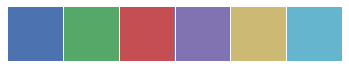

In [7]:
sns.palplot(sns.color_palette())

In [8]:
plot_order = ['age_range', 'race', 'gender', 'service_years_int_capped', 'county_size', 'highest_cert_abbr']
col_colors = {
    'gender': [SNS_RED, SNS_BLUE],
    'race': ['gray', SNS_YELLOW, SNS_BLUE, SNS_GREEN],
    'age_range': sns.color_palette('Blues_d', 4)[::-1],
    'county_size': sns.color_palette('Greens_d', 4)[::-1],
    'service_years_int_capped': [SNS_BLUE],
    'highest_cert_abbr': sns.color_palette()[:-1],
}
order = {
    'gender': ['FEMALE', 'MALE'],
    'race': ['WHITE', 'HISPANIC', 'BLACK', 'OTHER'],
    'age_range': ['21-30', '31-40', '41-50', '51+'],
    'county_size': ['XSMALL\n(< 10k)', 'SMALL\n(< 100k)', 'MEDIUM\n(100k-1MM)', 'LARGE\n(1MM+)'],
    'highest_cert_abbr': ['NONE', 'BASIC', 'INTERMEDIATE', 'ADVANCED', 'MASTER'],
}
col_printname = {
    'gender': 'Gender',
    'race': 'Race',
    'age_range': 'Age',
    'county_size': 'County Size',
    'service_years_int_capped': 'Service Time (years)',
    'highest_cert_abbr': 'Certification Level',
}
nostack = {'service_years_int_capped', 'highest_cert_abbr'}

def make_grid_plot(stack_col=None, alpha=0.8): 
    nrows = 3#2 if stack_col else 3
    fig, axes = plt.subplots(nrows, 2)
    axes = axes.flatten()

    fig.set_size_inches(18, 6 * nrows)
    if not stack_col:
        fig.suptitle("OVERVIEW - %s Texas police officers, as of May 2018" % "{:,}".format(len(officer_info)), fontsize=24)
    else:
        fig.suptitle("CROSSTAB - Texas officer demographics by " + col_printname[stack_col], fontsize=24)

    iax = 0
    for by_col in plot_order:
        if by_col == stack_col:
            continue
        ax = axes[iax]
        iax += 1
        if stack_col:
            vc = officer_info.groupby([by_col, stack_col]).size().unstack()
            vc = vc.div(vc.sum(axis=1), axis=0)
            vc = vc[order[stack_col]]
            color = col_colors[stack_col]
        else:
            vc = officer_info[by_col].value_counts(True)
            color = col_colors[by_col][::-1]

        if by_col == 'service_years_int_capped':
            vc = vc.sort_index()
            vc.plot(kind='bar', ax=ax, width=1, stacked=True, color=color, alpha=alpha)
            if stack_col:
                ax.set_ylim(0, 1.01)
                ax.set_yticks(np.arange(0, 1.01, .1))
            ax.set_xticklabels([(t.get_text() if int(t.get_text()) % 5 == 0 else '')
                                for t in ax.get_xticklabels()], rotation=0)
            ax.set_ylabel("Fraction of officers")
            ax.set_xlabel(col_printname[by_col])
            percentify_y(ax, decimals=0)
        else:
            vc = vc.loc[order[by_col]][::-1]
            vc.plot(kind='barh', ax=ax, width=.9, stacked=True, color=color, alpha=alpha)
            if stack_col:
                ax.set_xlim(0, 1.01)
                ax.set_xticks(np.arange(0, 1.01, .1))
            ax.set_xlabel("Fraction of officers")
            ax.set_ylabel(col_printname[by_col])
            percentify_x(ax, decimals=0)

        if stack_col:
            ax.set_title("%s distribution by %s" % (col_printname[stack_col], col_printname[by_col]))
            ax.legend()
        else:
            ax.set_title("By %s" % (col_printname[by_col]))
        plt.subplots_adjust(hspace=0.4, wspace=0.4, left=0.16)

    plotsaver.saveplot(fig, (stack_col or 'overview') + '_grid')

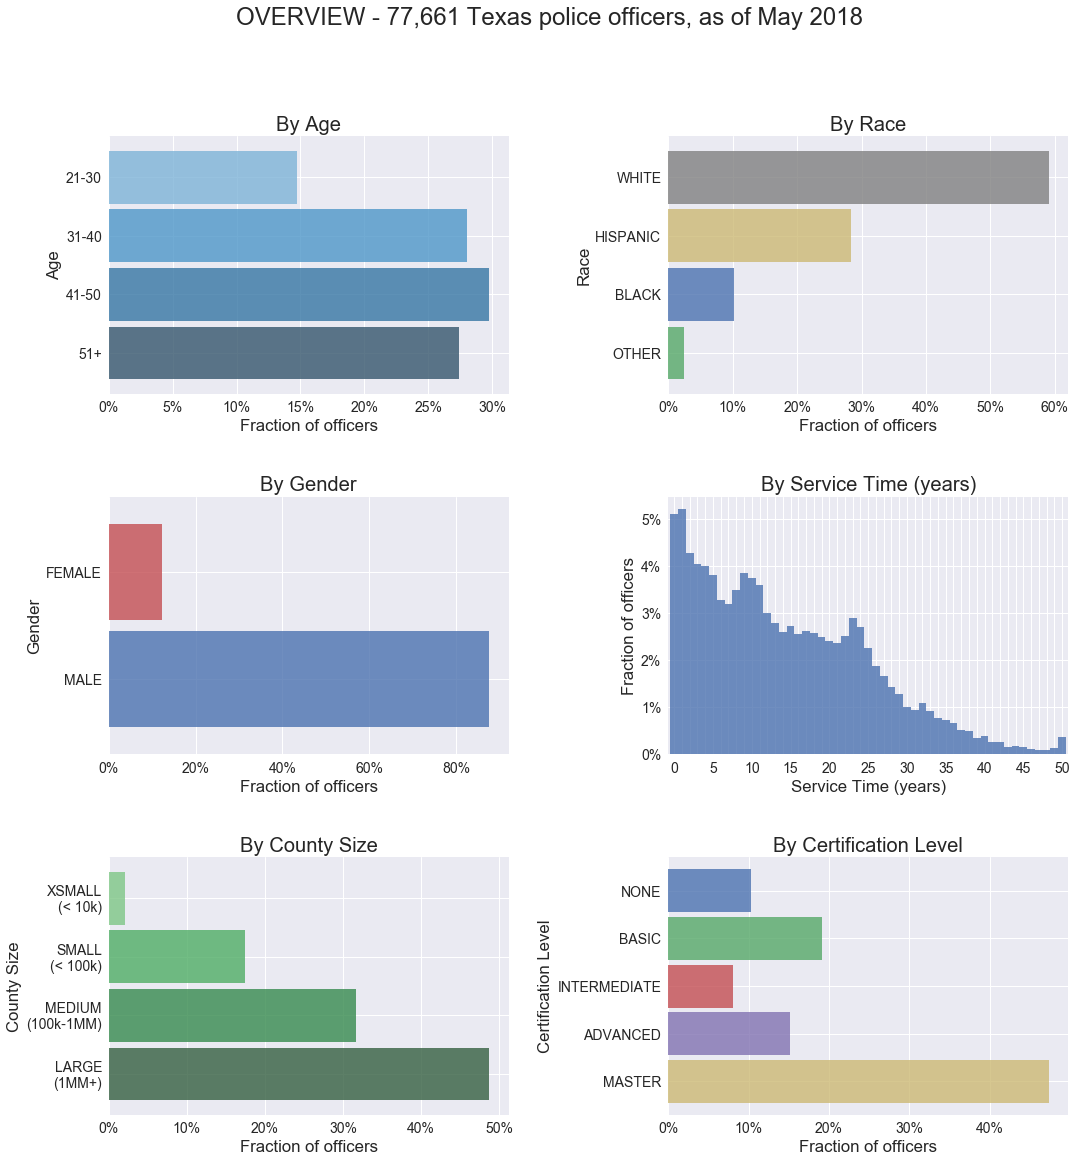

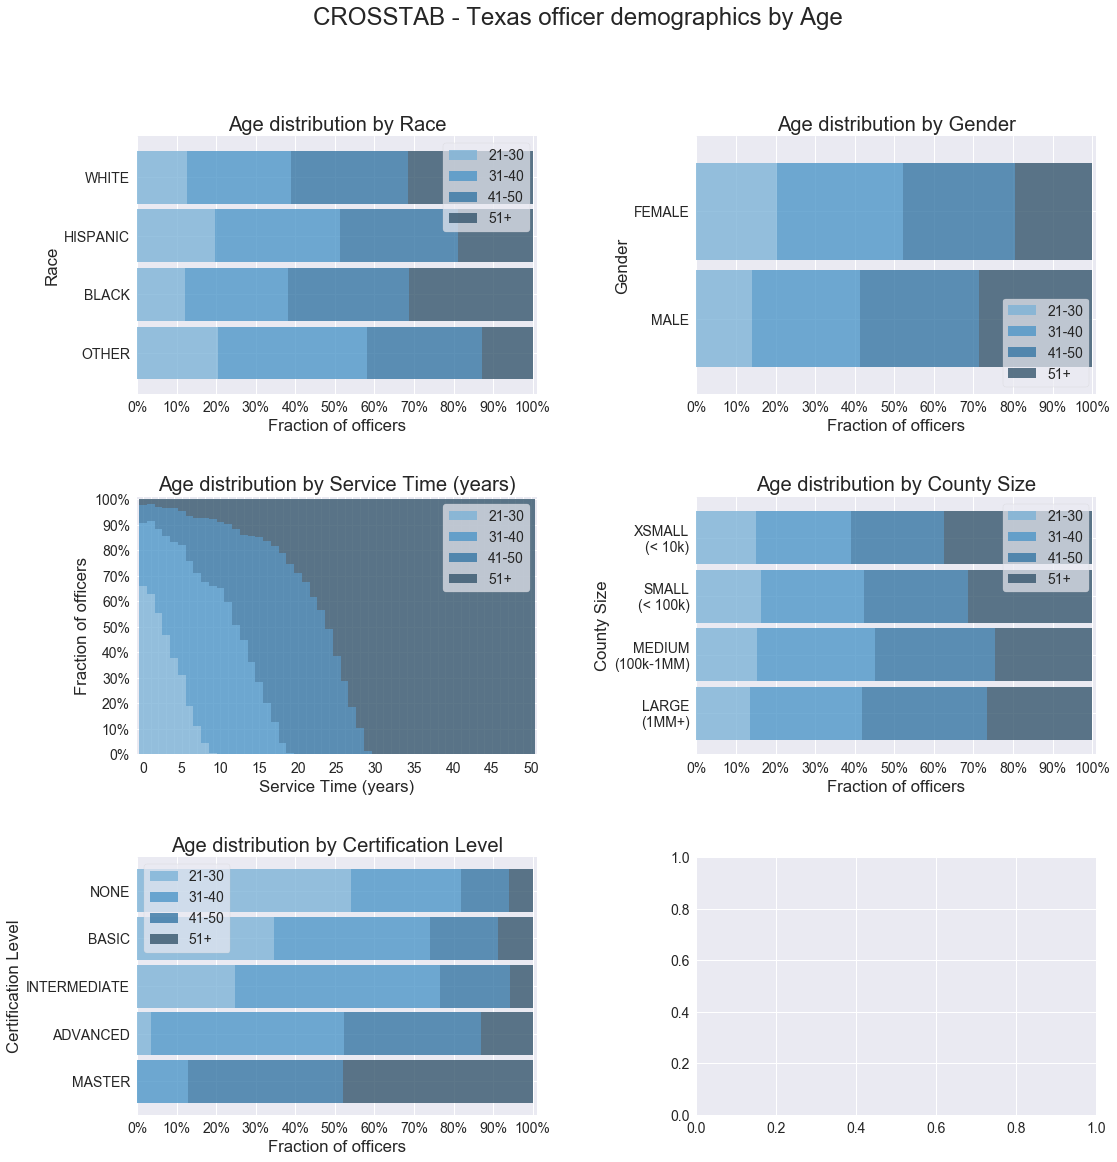

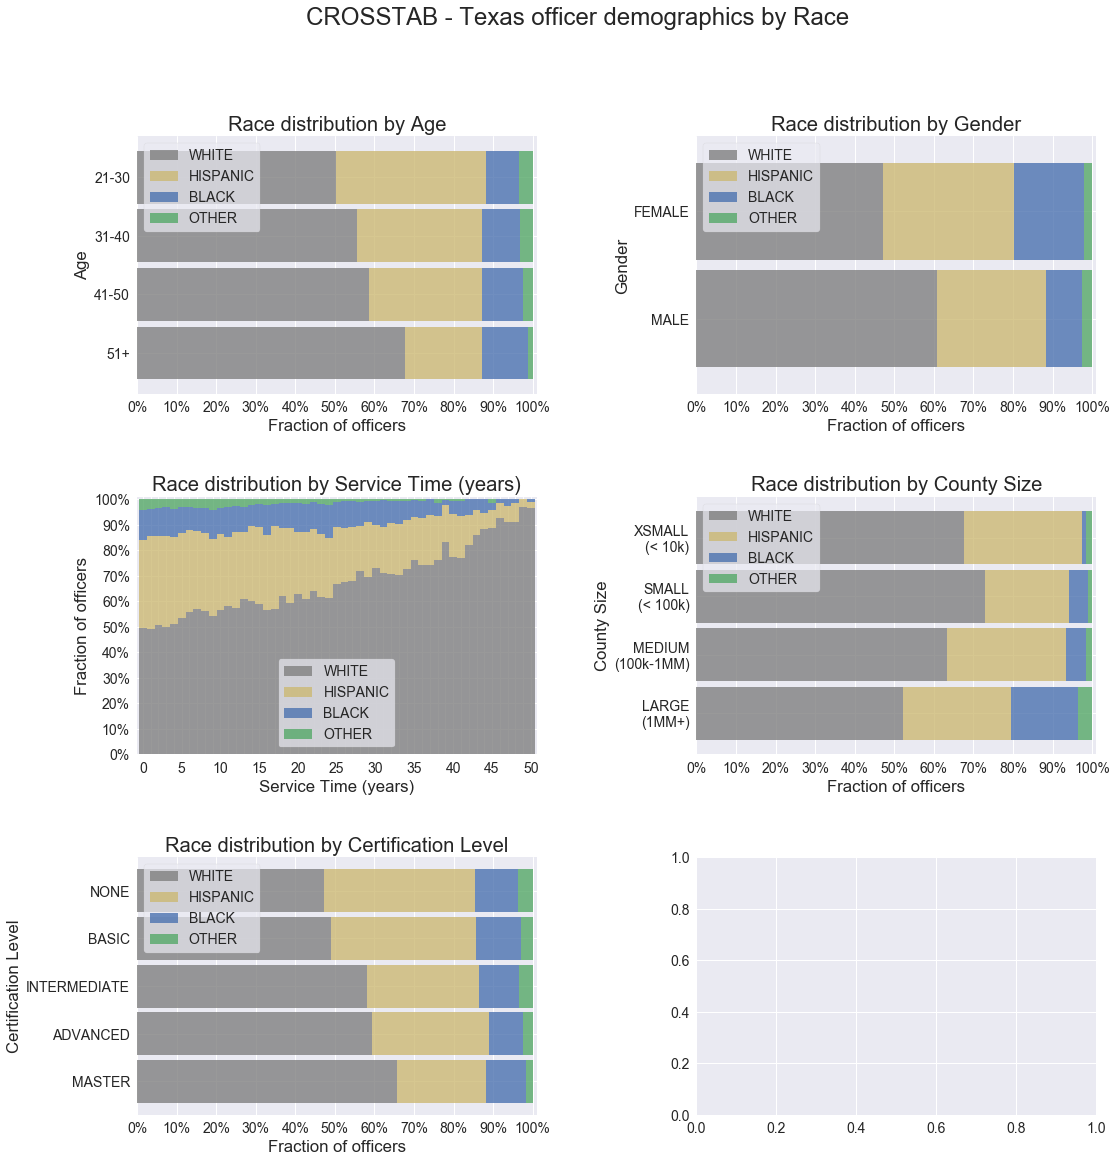

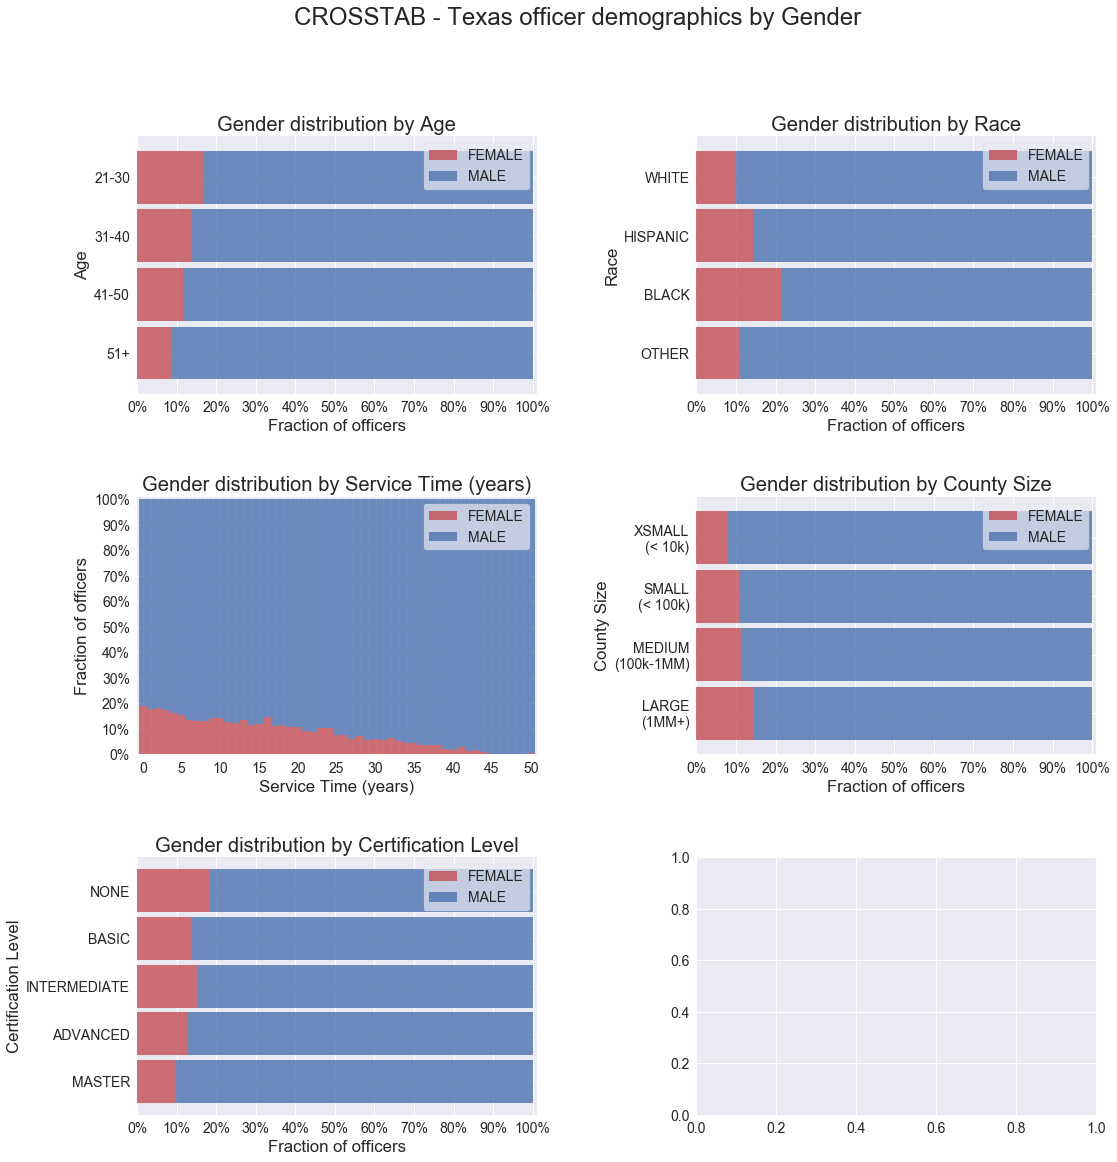

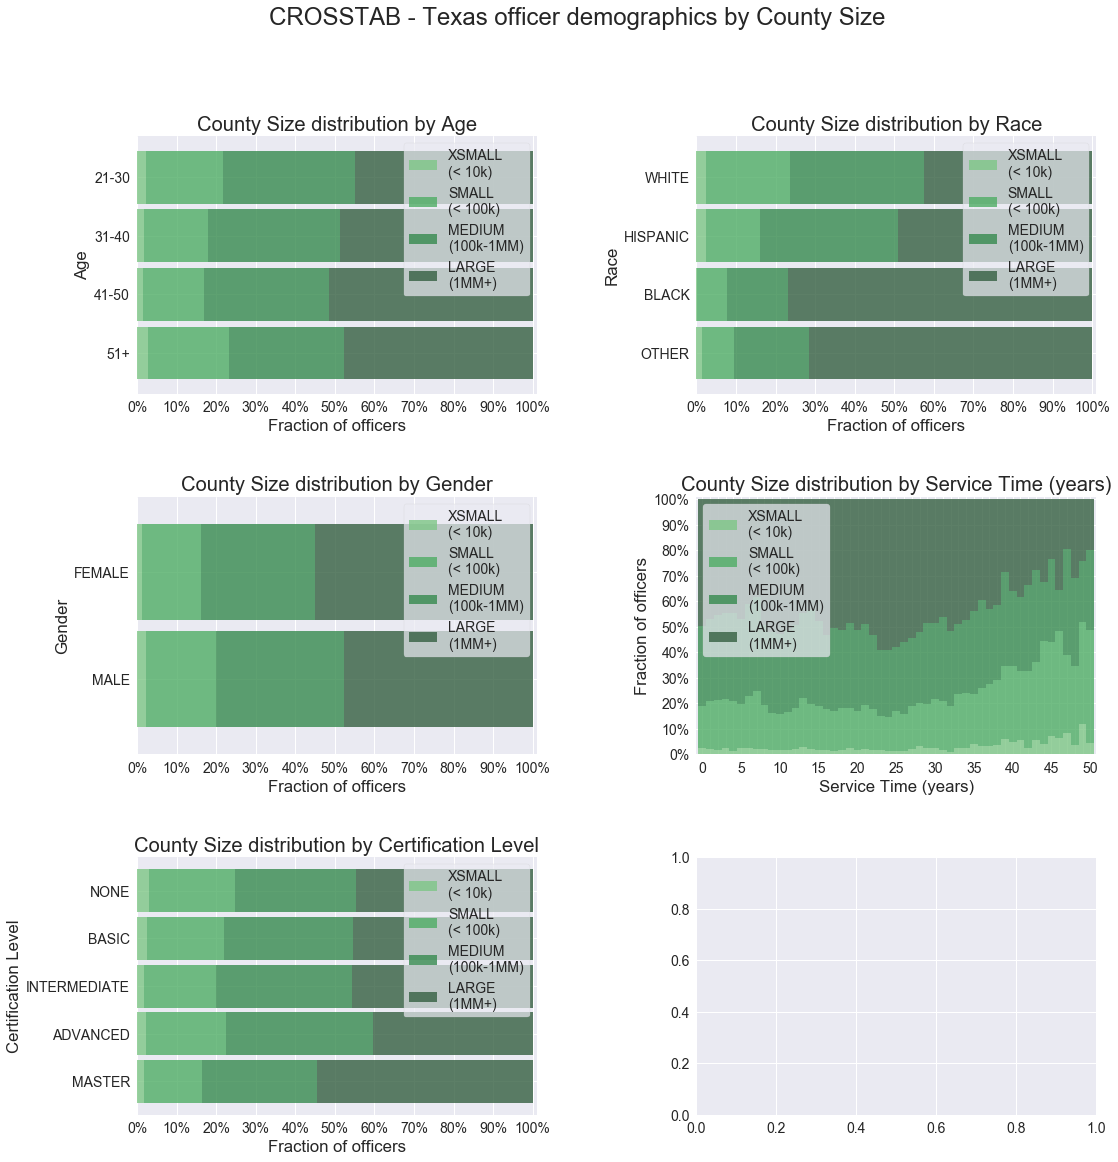

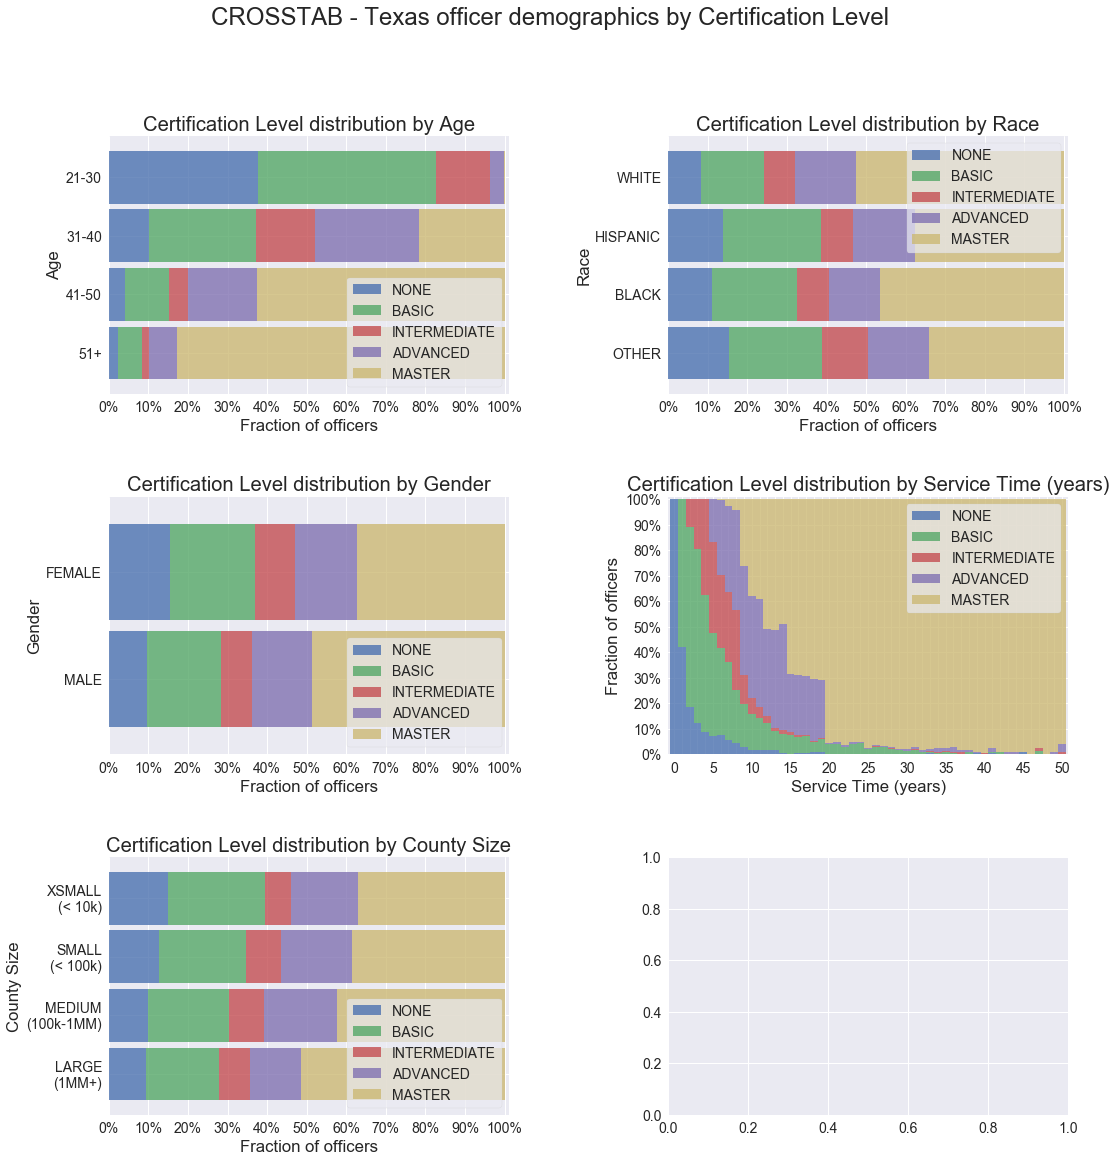

In [9]:
for by in [None] + plot_order:
    if by == 'service_years_int_capped':
        continue
    make_grid_plot(by)

## Another look at gender

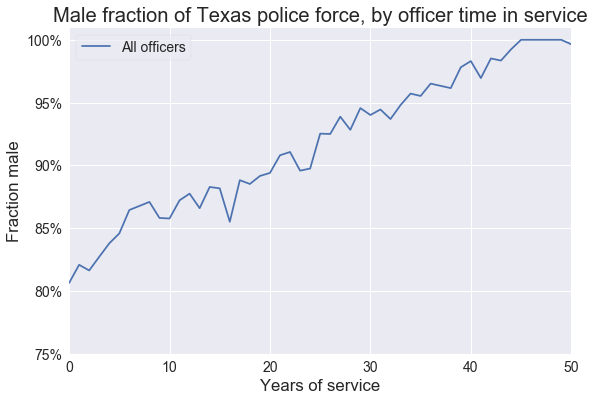

In [10]:
officer_info['is_male'] = officer_info.gender == 'MALE'
fig, ax = plt.subplots(1)
officer_info.groupby('service_years_int_capped')['is_male'].mean().plot(label='All officers')
ax.set_title('Male fraction of Texas police force, by officer time in service')
ax.set_xlabel('Years of service')
ax.set_ylabel('Fraction male')
ax.set_yticks(np.arange(.75, 1.01, .05))
percentify_y(ax, decimals=0)
ax.legend()
plotsaver.saveplot(fig, 'male_fraction_by_service_years')

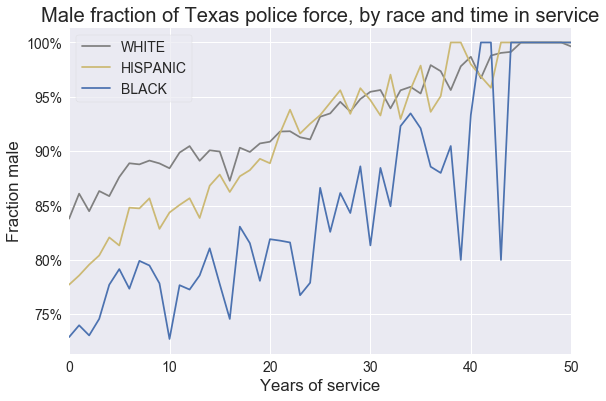

In [11]:
fig, ax = plt.subplots(1)
for race, color in zip(order['race'], col_colors['race']):
    if race == 'OTHER':
        continue
    frame = officer_info[officer_info.race == race]
    s = frame.groupby('service_years_int_capped')['is_male'].mean().sort_index()
    s.plot(kind='line', label=race, color=color)

percentify_y(ax, decimals=0)
ax.legend()
ax.set_title('Male fraction of Texas police force, by race and time in service')
ax.set_xlabel('Years of service')
ax.set_ylabel('Fraction male')
plotsaver.saveplot(fig, 'male_fraction_by_race_and_service_years')